# Applying Logistic Regression model to 'Heart Failure Prediction' dataset from Kaggle!

V1_Details:

- Data splitting ratio 80:20
- **One-hot encoded** the categorical columns

# Explore Dataset

In [1]:
import pandas as pd

path = "/kaggle/input/heart-failure-prediction/heart.csv"
df = pd.read_csv(path)

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

# Data Preprocessing

In [4]:
print(df.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [5]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [6]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(list(numerical_cols))

categorical_cols = df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(list(categorical_cols))

Numerical Columns:
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']

Categorical Columns:
['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [7]:
print("Unique values in categorical columns:")

for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"\n{col}: {len(unique_values)} unique values")
    print(unique_values)

Unique values in categorical columns:

Sex: 2 unique values
['M' 'F']

ChestPainType: 4 unique values
['ATA' 'NAP' 'ASY' 'TA']

RestingECG: 3 unique values
['Normal' 'ST' 'LVH']

ExerciseAngina: 2 unique values
['N' 'Y']

ST_Slope: 3 unique values
['Up' 'Flat' 'Down']


# Data Encoding (One-hot)

In [8]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype=int)
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


# Define Features (X) and Target (y)

In [9]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (918, 20)
y shape: (918,)


# Train-Test Split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Training samples: 734
Testing samples: 184


# Model Training

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

# Evaluation

## Classification Report

In [12]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



## Confusion Matrix

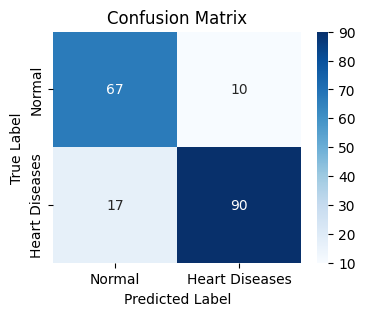

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Heart Diseases'],
            yticklabels=['Normal', 'Heart Diseases'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Receiver-operating characteristic curve (ROC)
- **Details can be found** [here](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

![ROC and AUC of a hypothetical perfect model.](https://developers.google.com/static/machine-learning/crash-course/images/auc_1-0.png)

![Figure 3. ROC and AUC of completely random guesses.](https://developers.google.com/static/machine-learning/crash-course/images/auc_0-5.png)

![ROC and AUC of two hypothetical models. The curve on the right, with a greater AUC, represents the better of the two models.](https://developers.google.com/static/machine-learning/crash-course/images/auc_0-65.png)

![ROC and AUC](https://developers.google.com/static/machine-learning/crash-course/images/auc_0-93.png)

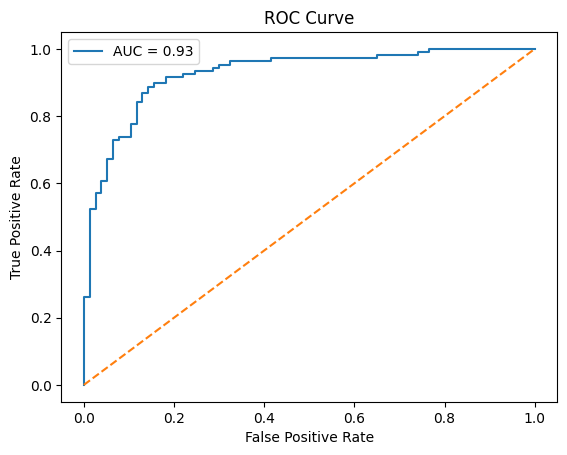

In [14]:
from sklearn.metrics import roc_curve, auc

y_probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Feature Importance

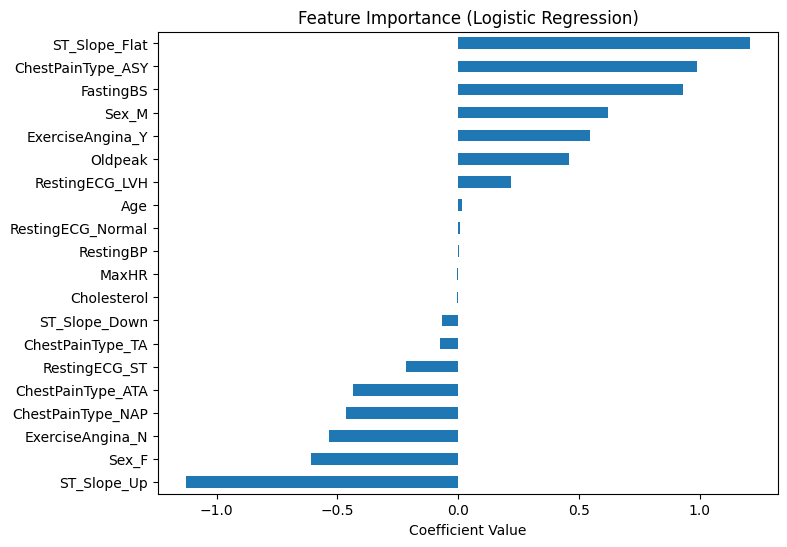

In [15]:
import pandas as pd

feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values()

plt.figure(figsize=(8, 6))
feature_importance.plot(kind='barh')

plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.show()